# Machine Learning

### (The project's data comes from Kaggle. <Train.csv> is used for ml training and <test.csv> is used for testing model.)
--- 
## **Description**: </br> </br> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. 
## **Goal**: </br> </br>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [83]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # remove all warnings from the output
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth',-1)

In [84]:
df_house=pd.read_csv('train.csv')

In [85]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [86]:
null_feature = [i for i in df_house.columns if df_house[i].isnull().sum() !=0]
null_feature

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Look at each feature with null

In [87]:
#calculate null percentage
def null(df, feature, plot=False):
    t = df[feature].isna().mean() * 100
    print(f'% of null: {t}%')
    if plot:
        sns.countplot(df[feature], palette='Set3')

### LotFontage (Linear feet of street connected to property)

In [88]:
null(df_house,'LotFrontage')

% of null: 17.73972602739726%


In [89]:
#use mean value to fill na in lotFontage
df_house['LotFrontage'].fillna(df_house['LotFrontage'].mean(), inplace=True)
df_house['LotFrontage'].isnull().sum()

0

### Alley (Type of alley access to property)

In [48]:
df_house['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

% of null: 93.76712328767123%


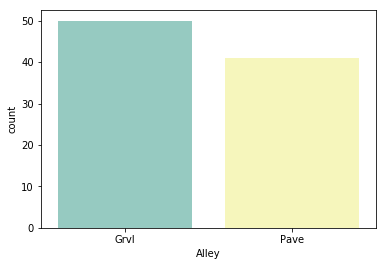

In [61]:
null(df_house,'Alley',True)

### Drop Alley column as its null percent is high.

In [62]:
df_house.drop('Alley', axis=1, inplace = True)

### MasVnrType (Masonry veneer type)

In [74]:
df_house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn     15 
Name: MasVnrType, dtype: int64

% of null: 0.547945205479452%


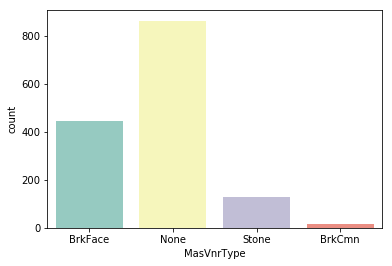

In [76]:
null(df_house,'MasVnrType',True)

In [77]:
df_house.fillna('None',inplace=True)

### MasVnrArea (Masonry veneer area in square feet)

In [90]:
null(df_house,'MasVnrArea')

% of null: 0.547945205479452%


In [91]:
df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].mean(), inplace=True)


### BsmtQual (Evaluates the height of the basement)

% of null: 2.5342465753424657%


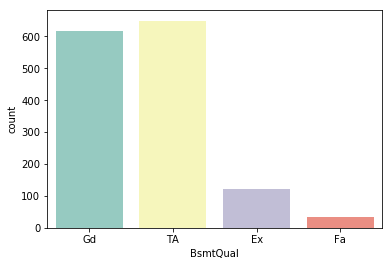

In [93]:
null(df_house,'BsmtQual',True)

In [94]:
df_house['BsmtQual'].fillna('TA', inplace=True)

### FireplaceQu (Fireplace quality)   


In [63]:
df_house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa    33 
Ex    24 
Po    20 
Name: FireplaceQu, dtype: int64

% of null: 47.26027397260274%


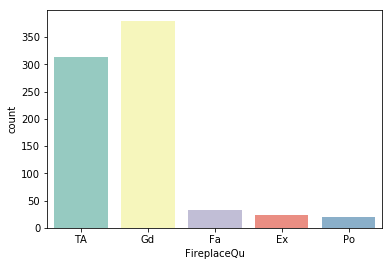

In [64]:
null(df_house,'FireplaceQu',True)

In [66]:
df_house['FireplaceQu'].fillna('Null', inplace=True)

In [11]:
df_house[df_house['SalePrice'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [12]:
df_house['SalePrice'].describe()

count    1460.000000  
mean     180921.195890
std      79442.502883 
min      34900.000000 
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
y_axis=df_house['SalePrice']
x_axis=df_house[['SaleType','SaleCondition','MSZoning','LotShape','Neighborhood','Condition1','Condition2']]

### Encoding

In [19]:
# onelable encoding before data split
from sklearn.preprocessing import LabelEncoder

x_axis=x_axis.apply(LabelEncoder().fit_transform)
x_axis

,SaleType,SaleCondition,MSZoning,LotShape,Neighborhood,Condition1,Condition2
0,8,4,3,3,5,2,2
1,8,4,3,3,24,1,2
2,8,4,3,0,5,2,2
3,8,0,3,0,6,2,2
4,8,4,3,0,15,2,2
5,8,4,3,0,11,2,2
6,8,4,3,3,21,2,2
7,8,4,3,0,14,4,2
8,8,0,4,3,17,0,2
9,8,4,3,3,3,0,0


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split(x_axis,y_axis,test_size=0.3,random_state=0)

In [39]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred=cross_val_score(model,x_axis,y_axis,cv=5,scoring='r2')
    return pred

def print_evaluate (true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    print('MAE:',mae)
    print('MSE:',mse)
    print('RMSE:',rmse)
    print('R Square:',r2_square)

def evaluate (true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    return mae, mse, rmse, r2_square  


In [23]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
print(lin_reg.intercept_)#y=ax+b里面b的值

164276.23832098645


In [30]:
coeff=pd.DataFrame(lin_reg.coef_,x_axis.columns,columns=['Coefficient'])#a的值 ，a也是bias
coeff

,Coefficient
SaleType,-5371.275160
SaleCondition,16710.739954
MSZoning,-10640.066402
LotShape,-12677.454664
Neighborhood,1812.022829
Condition1,3784.548155
Condition2,10319.744593


In [31]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('train set evaluation:\n_____________')
print_evaluate(y_train,train_pred)
print('===============')
print('test set evaluation:\n_____________')
print_evaluate(y_test,test_pred)

train set evaluation:
_____________
MAE: 52036.80153371311
MSE: 5116040730.378992
RMSE: 71526.50369184134
R Square: 0.16127127791149387
test set evaluation:
_____________
MAE: 51793.88036026865
MSE: 5686446070.570261
RMSE: 75408.52783717675
R Square: 0.16240193848829


In [40]:
evaluate_df = pd.DataFrame(data=[["Linear Regression",*evaluate(y_test,test_pred),cross_val(LinearRegression())]],
                      columns=['Model','MAE','MSE','RMSE','R Square','Cross Validation'])#分割完数据集后，我们训练模型，那模型的表现到底如何呢？我们可以使用这个函数来看模型的评分。

In [41]:
evaluate_df

,Model,MAE,MSE,RMSE,R Square,Cross Validation
0,Linear Regression,51793.88036,5.686446e+09,75408.527837,0.162402,"[0.11069675696623171, 0.1888345646081896, 0.1702571257530897, 0.17229883158998172, 0.12973706636405125]"
